<font size="+3" color='#053c96'><h2><center> Boosting Loan Acceptance Rates for Galaxy Bank with Predictive Modelling</h2></center></font>
<figure>
<center><img src ="https://i0.wp.com/www.socialtoaster.com/wp-content/uploads/2018/10/Finance-and-Retail-Banking-Blog-Post.jpg?w=1200&ssl=1" width = "750" height = '600' alt="Finance"/>

<font size="+3" color='#053c96'><b> Contributors</b></font>  
<font size="+1" ><b> Umar Kabir</b></font>  

<a id='table-of-contents'></a>
[Table of Contents](#table-of-contents)

- [Introduction](#introduction)
  * [Overview](#overview)
  * [Problem Statement](#problem-statement)
  * [Objectives](#goals)
- [Importing Libraries](#importing-dependencies)
- [Data](#data)
- [Exploratory Data Analysis](#exploratory-data-analysis)
  * [Data Exploration](#data-exploration)
  * [Data Visualization](#data-visualization)
  * [Summary Statistics](#summary-statistics)
  * [Feature Correlation](#feature-correlation)
- [Data Preparation](#data-preparation)
  * [Data Cleaning](#data-cleaning)
  * [Feature Engineering](#feature-engineering)
  * [Feature Selection](#data-transformation)
- [Modeling](#modeling)
  * [Model Selection](#model-selection)
  * [Model Training & Evaluation](#model-training)
- [Results](#results)
  * [Analysis Results](#analysis-results)
  * [Model Performance](#model-performance)
  * [Feature Importance](#feature-importance)
  * [Implications](#implications)
- [Conclusion](#conclusion)
  * [Summary](#summary)
  * [Limitations](#limitations)
  * [Recommendations](#recommendations)
- [References](#references)

<a id='introduction'></a>
<font size="+2" color='#053c96'><b> 1. Introduction</b></font>  
[back to top](#table-of-contents)  

<img src ="https://marketingtwentyone.co.uk/wp-content/uploads/2018/03/xIntroduction-BL.png.pagespeed.ic.atra3Xd4iS.webp" width = "350" height = '200' alt="Intro"/>


Welcome to this project aimed at helping Galaxy Bank increase its loan conversion rates by identifying potential deposit customers who are most likely to accept loan offers. The bank has been successful in upselling to its deposit clients in the past, but not all customers offered a loan accept it. To improve their marketing efforts and achieve a higher conversion rate, the bank wants to predict and target customers who are more likely to accept loan offers. In this project, we will work with the marketing leadership team to develop a predictive model that can identify potential loan customers and help Galaxy Bank achieve its upselling goals efficiently.

<a id='problem-statement'></a>
<font size="+1" color='#780404'><b> 1.1 Problem Statement</b></font>  
[back to top](#table-of-contents)  

Galaxy Bank is facing a challenge in converting deposit customers to personal loan customers. Although the bank has had some success in upselling to its deposit clients in the past, not all customers offered a loan accept it. The bank's campaign last year showed a healthy loan acceptance conversion rate of over 9%, but the marketing department is looking to improve this rate with better target marketing and a minimal budget. The challenge is to identify factors that influence a customer's decision to accept a loan offer and develop a predictive model that can analyze customer data to identify potential loan customers. The aim is to help Galaxy Bank increase loan acceptance conversion rates, target potential loan customers with better accuracy, and achieve its upselling objectives more efficiently.

<a id='problem-statement'></a>
<font size="+1" color='#780404'><b> 1.2 Mission</b></font>  
[back to top](#table-of-contents)  

The goal of this project is to assist Galaxy Bank in increasing its loan acceptance conversion rates by developing a predictive model that can identify potential loan customers from its deposit client base. By analyzing customer data and identifying factors that influence loan acceptance decisions, we aim to help the bank's marketing team target potential loan customers more efficiently and effectively. Our mission is to work closely with the marketing leadership team at Galaxy Bank to develop a predictive model that can improve loan acceptance conversion rates and achieve the bank's upselling goals with a minimal marketing budget.

<a id='goals'></a>
<font size="+1" color='#780404'><b> 1.3 Objectives</b></font>  
[back to top](#table-of-contents)  

The specific goals of this project are:  

- To identify the key factors that influence a customer's decision to accept a loan offer from Galaxy Bank, using historical data on loan acceptance and customer characteristics.

- To develop a predictive model that can analyze customer data and accurately predict which deposit clients are most likely to accept a loan offer from the bank.

- To test the performance of the predictive model and refine it to ensure that it can identify potential loan customers with a high degree of accuracy.

- To work with the marketing leadership team at Galaxy Bank to incorporate the predictive model into their marketing campaigns and improve loan acceptance conversion rates.

- To monitor the performance of the predictive model and make necessary adjustments to ensure its continued effectiveness in identifying potential loan customers and achieving the bank's upselling objectives.

<a id='importing-dependencies'></a>
<font size="+2" color='#053c96'><b> 2. Importing Libraries</b></font>  
[back to top](#table-of-contents)

In [1]:
!pip install --quiet seaborn
!pip install --quiet scikit-learn
!pip install --quiet imblearn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import skew, kurtosis
from sklearn.ensemble import RandomForestClassifier

# Libraries for regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# Libraries for performance evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

<a id='data'></a>
<font size="+2" color='#053c96'><b> 3. Data</b></font>  
[back to top](#table-of-contents)

In [2]:
df = pd.read_csv('Visa_For_Lisa_Loan_Modelling.csv')

In [3]:
data = df.copy()

<a id='exploratory-data-analysis'></a>
<font size="+2" color='#053c96'><b> 4. Exploratory Data Anaysis</b></font>  
[back to top](#table-of-contents)  

<div style="float: left; margin-right: 10px;">
  <img src ="https://cdn.activestate.com/wp-content/uploads/2019/08/exploratory-data-analysis-using-python-blog-hero.jpg" width="300" height="150" alt="Intro"/>
</div>

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process, where we explore and understand the data we are working with. In EDA, we use visual and statistical techniques to summarize and interpret the main features and patterns in the data. The purpose of EDA is to gain insights into the data, identify any anomalies or outliers, check for data quality and completeness, and make decisions about the best statistical methods to use for modeling. Through EDA, we can uncover patterns, relationships, and correlations in the data that can help inform our predictive modeling efforts. In this project, EDA will be an essential step in the data preparation phase before developing the predictive model.

<a id='data-exploration'></a>
<font size="+1" color='#780404'><b> 4.1 Data Exploration</b></font>  
[back to top](#table-of-contents)

Checking the Info of the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
print('There are', data.shape[0], 'rows in the dataset')
print()
print('There are', data.shape[1], 'columns in the dataset')

There are 5000 rows in the dataset

There are 14 columns in the dataset


In [6]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

Next, we will have an overview of what the data looks like

In [7]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


- ID: Unique identifier for each customer
- Age: Age of the customer
- Experience: Number of years of professional experience
- Income: Annual income of the customer in thousands of dollars
- ZIP Code: ZIP code of the customer's address
- Family: Family size of the customer
- CCAvg: Average credit card spending per month
- Education: Level of education of the customer, with 1 representing undergraduate, 2 representing graduate, and 3 representing advanced/professional degrees
- Mortgage: Value of house mortgage if any (in thousands of dollars)
- Personal Loan: Indicates whether or not the customer accepted a personal loan offer from Galaxy Bank (1 = yes, 0 = no)
- Securities Account: Indicates whether or not the customer has a securities account with Galaxy Bank (1 = yes, 0 = no)
- CD Account: Indicates whether or not the customer has a certificate of deposit (CD) account with Galaxy Bank (1 = yes, 0 = no)
- Online: Indicates whether or not the customer uses internet banking facilities (1 = yes, 0 = no)
- CreditCard: Indicates whether or not the customer uses a Galaxy Bank credit card (1 = yes, 0 = no)

In [8]:
data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

<a id='data-visualization'></a>
<font size="+1" color='#780404'><b> 4.2 Data Visualization</b></font>  
[back to top](#table-of-contents)

A bar chart is created using seaborn, with the x-axis representing the different types of personal loans and the y-axis representing the count of loans.

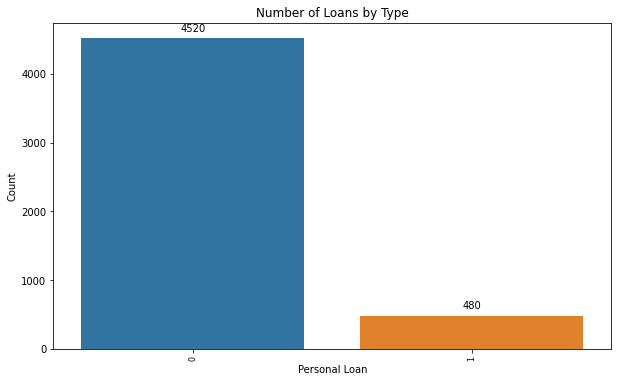

In [9]:

# count the number of occurrences for each type
type_counts = data['Personal Loan'].value_counts()

# set the figure size
plt.figure(figsize=(10, 6))

# create the bar chart using seaborn
ax = sns.barplot(x=type_counts.index, y=type_counts.values)

# rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)

# set axis labels and title
ax.set_xlabel('Personal Loan')
ax.set_ylabel('Count')
ax.set_title('Number of Loans by Type')

for p in ax.patches:
    ax.annotate(str(round(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# show the plot
plt.show()


A bar chart is created using seaborn, with the x-axis representing the different ages and the y-axis representing the count of ages.

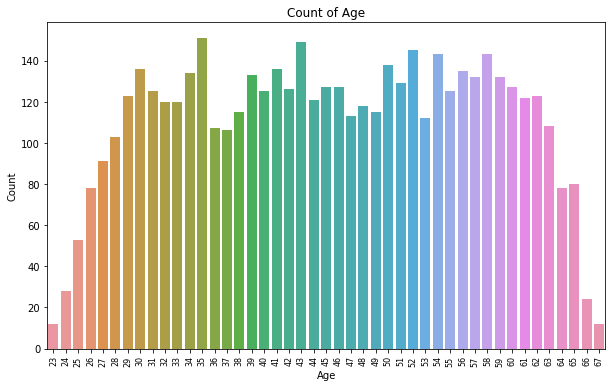

In [10]:

# count the number of occurrences for each type
type_counts = data['Age'].value_counts()

# set the figure size
plt.figure(figsize=(10, 6))

# create the bar chart using seaborn
ax = sns.barplot(x=type_counts.index, y=type_counts.values)

# rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)

# set axis labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Count of Age')

# show the plot
plt.show()


A bar chart is created using seaborn, with the x-axis representing the different years of experience and the y-axis representing the count of years.

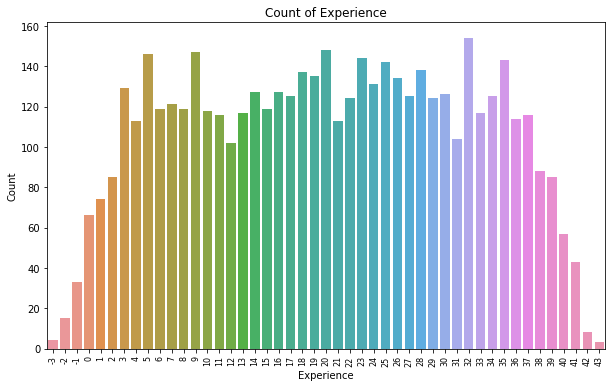

In [11]:

# count the number of occurrences for each type
type_counts = data['Experience'].value_counts()

# set the figure size
plt.figure(figsize=(10, 6))

# create the bar chart using seaborn
ax = sns.barplot(x=type_counts.index, y=type_counts.values)

# rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)

# set axis labels and title
ax.set_xlabel('Experience')
ax.set_ylabel('Count')
ax.set_title('Count of Experience')

# show the plot
plt.show()


A mini dataframe showing cases where experience is negative

In [12]:
negative_exp = data[(data['Experience'] == -1) | (data['Experience'] == -2) | (data['Experience'] == -3)]
negative_exp

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


A bar chart is created using seaborn, with the x-axis representing the different types of family size and the y-axis representing the count of sizes.

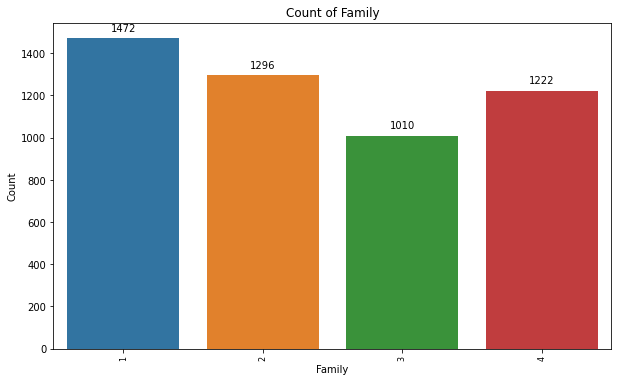

In [13]:

# count the number of occurrences for each type
type_counts = data['Family'].value_counts()

# set the figure size
plt.figure(figsize=(10, 6))

# create the bar chart using seaborn
ax = sns.barplot(x=type_counts.index, y=type_counts.values)

# rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)

# set axis labels and title
ax.set_xlabel('Family')
ax.set_ylabel('Count')
ax.set_title('Count of Family')

for p in ax.patches:
    ax.annotate(str(round(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# show the plot
plt.show()


A bar chart is created using seaborn, with the x-axis representing the different CCAvg and the y-axis representing the count of CCAvg.

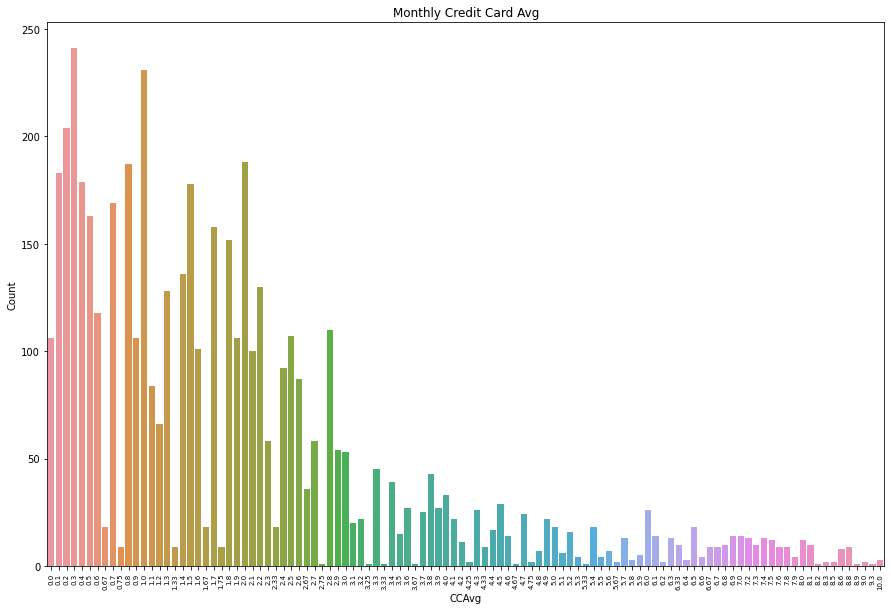

In [14]:

# count the number of occurrences for each type
type_counts = data['CCAvg'].value_counts()

# set the figure size
plt.figure(figsize=(15, 10))

# create the bar chart using seaborn
ax = sns.barplot(x=type_counts.index, y=type_counts.values)

# rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=7)

# set axis labels and title
ax.set_xlabel('CCAvg')
ax.set_ylabel('Count')
ax.set_title('Monthly Credit Card Avg')

# show the plot
plt.show()

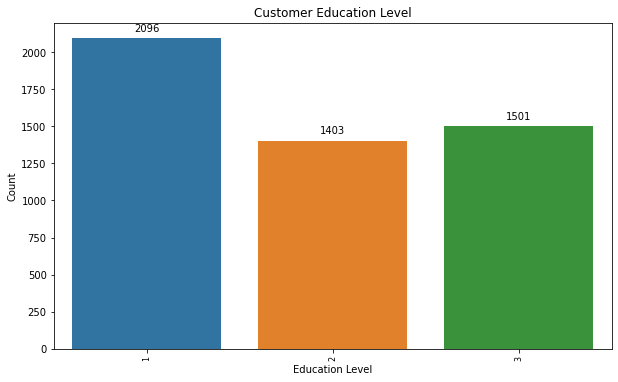

In [15]:

# count the number of occurrences for each type
type_counts = data['Education'].value_counts()

# set the figure size
plt.figure(figsize=(10, 6))

# create the bar chart using seaborn
ax = sns.barplot(x=type_counts.index, y=type_counts.values)

# rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)

# set axis labels and title
ax.set_xlabel('Education Level')
ax.set_ylabel('Count')
ax.set_title('Customer Education Level')

for p in ax.patches:
    ax.annotate(str(round(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# show the plot
plt.show()


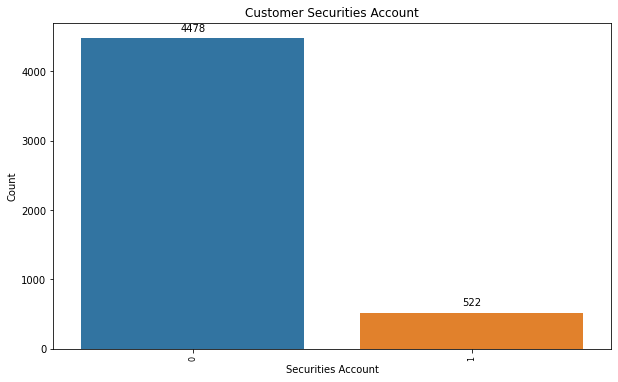

In [16]:

# count the number of occurrences for each type
type_counts = data['Securities Account'].value_counts()

# set the figure size
plt.figure(figsize=(10, 6))

# create the bar chart using seaborn
ax = sns.barplot(x=type_counts.index, y=type_counts.values)

# rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)

# set axis labels and title
ax.set_xlabel('Securities Account')
ax.set_ylabel('Count')
ax.set_title('Customer Securities Account')

for p in ax.patches:
    ax.annotate(str(round(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# show the plot
plt.show()


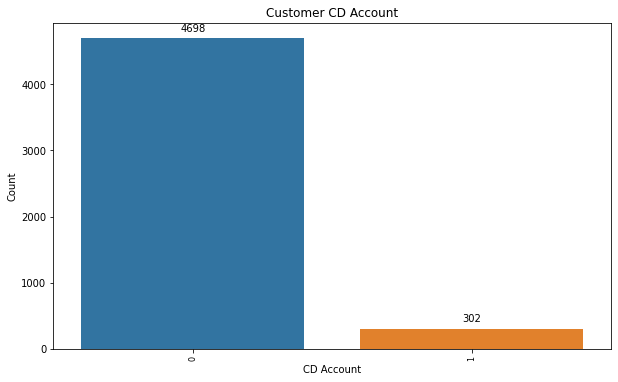

In [17]:

# count the number of occurrences for each type
type_counts = data['CD Account'].value_counts()

# set the figure size
plt.figure(figsize=(10, 6))

# create the bar chart using seaborn
ax = sns.barplot(x=type_counts.index, y=type_counts.values)

# rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)

# set axis labels and title
ax.set_xlabel('CD Account')
ax.set_ylabel('Count')
ax.set_title('Customer CD Account')

for p in ax.patches:
    ax.annotate(str(round(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# show the plot
plt.show()


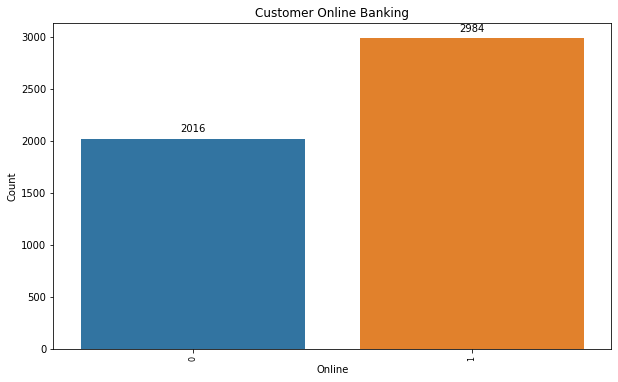

In [18]:

# count the number of occurrences for each type
type_counts = data['Online'].value_counts()

# set the figure size
plt.figure(figsize=(10, 6))

# create the bar chart using seaborn
ax = sns.barplot(x=type_counts.index, y=type_counts.values)

# rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)

# set axis labels and title
ax.set_xlabel('Online')
ax.set_ylabel('Count')
ax.set_title('Customer Online Banking')

for p in ax.patches:
    ax.annotate(str(round(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# show the plot
plt.show()


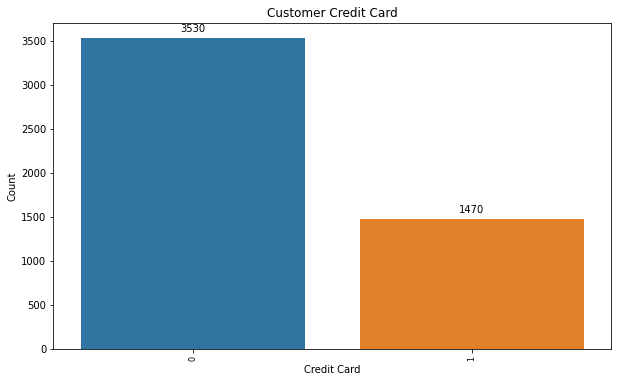

In [19]:

# count the number of occurrences for each type
type_counts = data['CreditCard'].value_counts()

# set the figure size
plt.figure(figsize=(10, 6))

# create the bar chart using seaborn
ax = sns.barplot(x=type_counts.index, y=type_counts.values)

# rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)

# set axis labels and title
ax.set_xlabel('Credit Card')
ax.set_ylabel('Count')
ax.set_title('Customer Credit Card')

for p in ax.patches:
    ax.annotate(str(round(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# show the plot
plt.show()


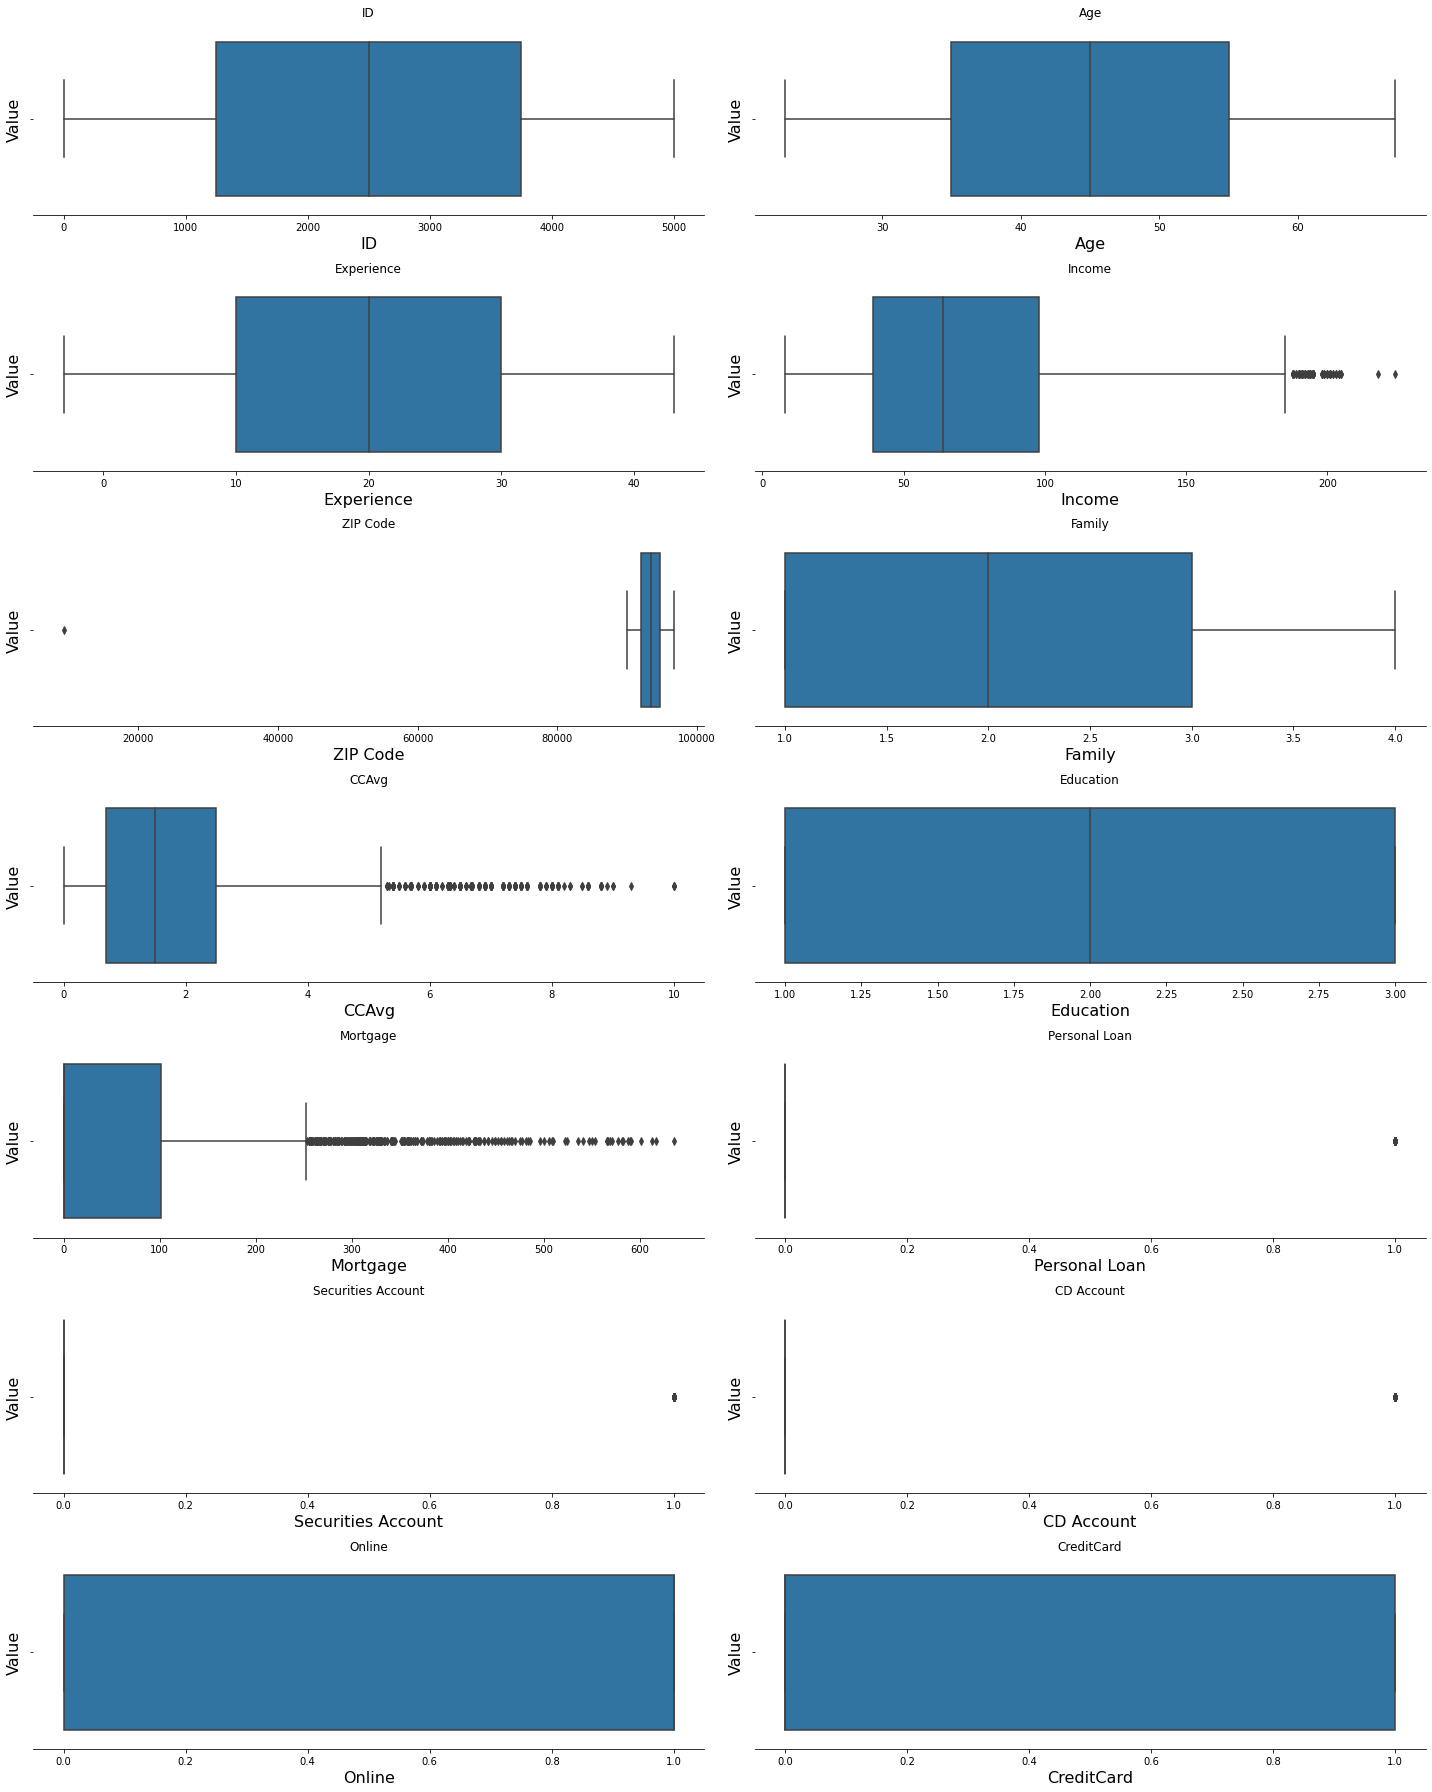

In [20]:
columns_to_plot = ['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
                   'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
                   'CD Account', 'Online', 'CreditCard']

# Create subplots for the columns
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(20, 25))

# Create box plots for each column
for idx, column in enumerate(columns_to_plot):
    row_idx = idx // 2
    col_idx = idx % 2
    sns.boxplot(x=data[column], data=data, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(column)
    sns.set_style('whitegrid')
    sns.despine(left=True)
    axes[row_idx, col_idx].set_xlabel(column, fontsize=16)
    axes[row_idx, col_idx].set_ylabel('Value', fontsize=16)

# Display the plots
plt.tight_layout()
plt.show()


<Figure size 2520x1440 with 0 Axes>

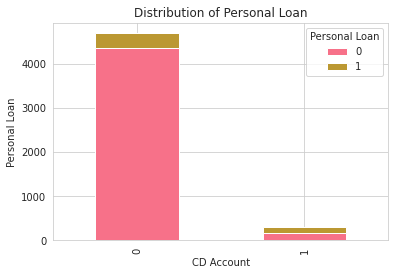

In [21]:
grouped = data.groupby(['CD Account', 'Personal Loan'])['Personal Loan'].count().unstack()

# Set the figure size
#plt.subplots(figsize=(10, 6))
plt.figure(figsize = (35,20))
# Plot a stacked bar chart of the wine types for each country
sns.set_palette('husl')
grouped.plot(kind='bar', stacked=True)
plt.xlabel('CD Account')
plt.ylabel('Personal Loan')
plt.title('Distribution of Personal Loan')
plt.show();

<Figure size 2520x1440 with 0 Axes>

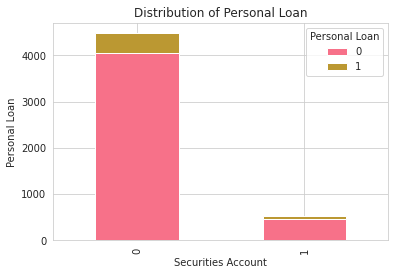

In [22]:
grouped = data.groupby(['Securities Account', 'Personal Loan'])['Personal Loan'].count().unstack()

# Set the figure size
#plt.subplots(figsize=(10, 6))
plt.figure(figsize = (35,20))
# Plot a stacked bar chart of the wine types for each country
sns.set_palette('husl')
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Securities Account')
plt.ylabel('Personal Loan')
plt.title('Distribution of Personal Loan')
plt.show();

<Figure size 2520x1440 with 0 Axes>

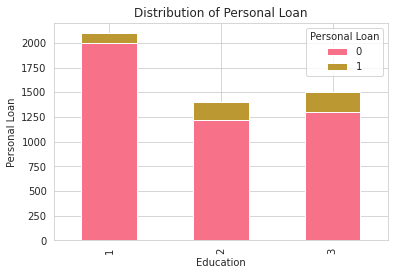

In [23]:
grouped = data.groupby(['Education', 'Personal Loan'])['Personal Loan'].count().unstack()

# Set the figure size
#plt.subplots(figsize=(10, 6))
plt.figure(figsize = (35,20))
# Plot a stacked bar chart of the wine types for each country
sns.set_palette('husl')
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Education')
plt.ylabel('Personal Loan')
plt.title('Distribution of Personal Loan')
plt.show();

<Figure size 2520x1440 with 0 Axes>

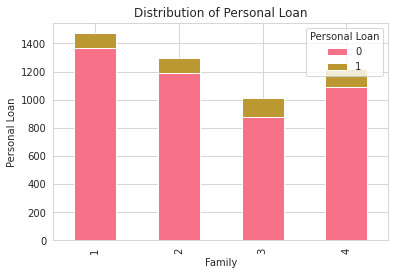

In [24]:
grouped = data.groupby(['Family', 'Personal Loan'])['Personal Loan'].count().unstack()

# Set the figure size
#plt.subplots(figsize=(10, 6))
plt.figure(figsize = (35,20))
# Plot a stacked bar chart of the wine types for each country
sns.set_palette('husl')
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Family')
plt.ylabel('Personal Loan')
plt.title('Distribution of Personal Loan')
plt.show();

<Figure size 2520x1440 with 0 Axes>

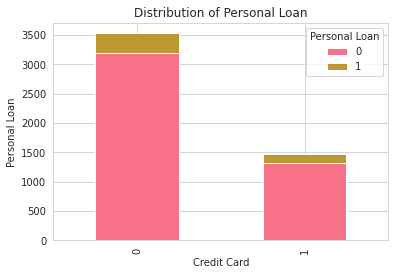

In [25]:
grouped = data.groupby(['CreditCard', 'Personal Loan'])['Personal Loan'].count().unstack()

# Set the figure size
#plt.subplots(figsize=(10, 6))
plt.figure(figsize = (35,20))
# Plot a stacked bar chart of the wine types for each country
sns.set_palette('husl')
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Credit Card')
plt.ylabel('Personal Loan')
plt.title('Distribution of Personal Loan')
plt.show();

<Figure size 2520x1440 with 0 Axes>

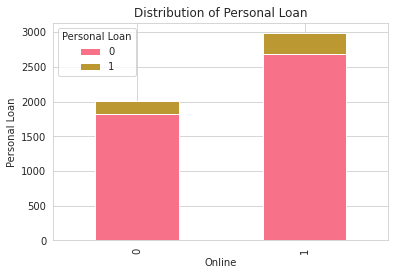

In [26]:
grouped = data.groupby(['Online', 'Personal Loan'])['Personal Loan'].count().unstack()

# Set the figure size
#plt.subplots(figsize=(10, 6))
plt.figure(figsize = (35,20))
# Plot a stacked bar chart of the wine types for each country
sns.set_palette('husl')
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Online')
plt.ylabel('Personal Loan')
plt.title('Distribution of Personal Loan')
plt.show();

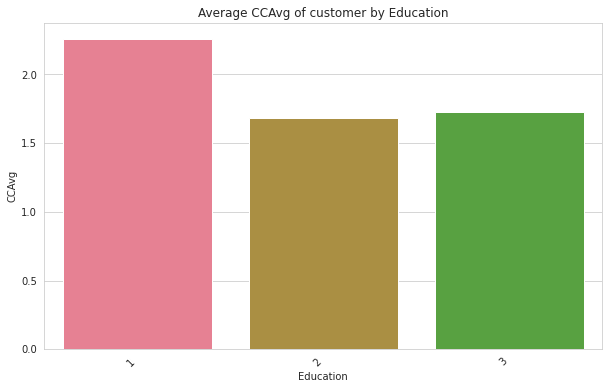

In [27]:
# Group the wines by country and calculate the mean price for each group
grouped = data.groupby('Education')['CCAvg'].mean().reset_index()

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the mean prices for each country
ax = sns.barplot(data=grouped, x='Education', y='CCAvg')

# Rotate the x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.xlabel('Education')
plt.ylabel('CCAvg')
plt.title('Average CCAvg of customer by Education')
plt.show()

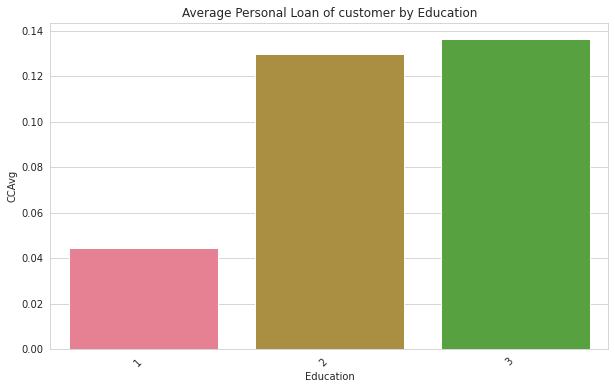

In [28]:
# Group the wines by country and calculate the mean price for each group
grouped = data.groupby('Education')['Personal Loan'].mean().reset_index()

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the mean prices for each country
ax = sns.barplot(data=grouped, x='Education', y='Personal Loan')

# Rotate the x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.xlabel('Education')
plt.ylabel('CCAvg')
plt.title('Average Personal Loan of customer by Education')
plt.show()

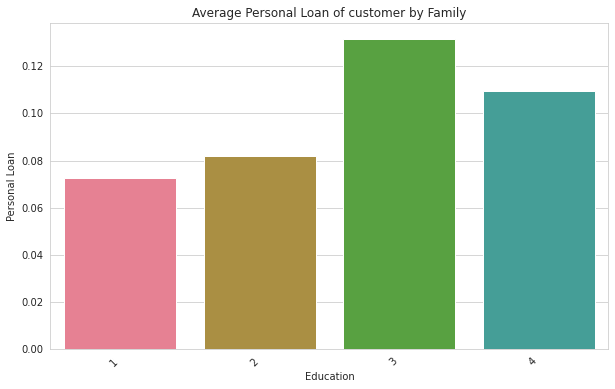

In [29]:
# Group the wines by country and calculate the mean price for each group
grouped = data.groupby('Family')['Personal Loan'].mean().reset_index()

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the mean prices for each country
ax = sns.barplot(data=grouped, x='Family', y='Personal Loan')

# Rotate the x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.xlabel('Education')
plt.ylabel('Personal Loan')
plt.title('Average Personal Loan of customer by Family')
plt.show()

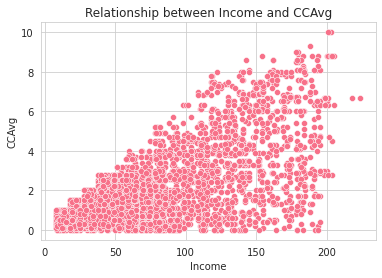

In [30]:
sns.scatterplot(x="Income", y="CCAvg", data=data)
plt.title("Relationship between Income and CCAvg")
plt.show()

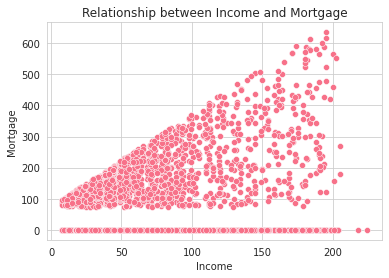

In [31]:
sns.scatterplot(x="Income", y="Mortgage", data=data)
plt.title("Relationship between Income and Mortgage")
plt.show()

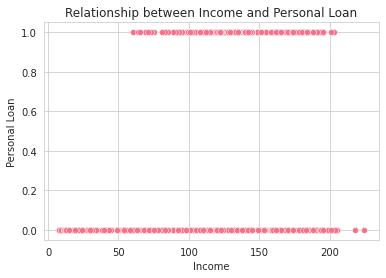

In [32]:
sns.scatterplot(x="Income", y="Personal Loan", data=data)
plt.title("Relationship between Income and Personal Loan")
plt.show()

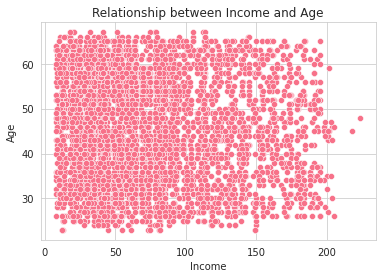

In [33]:
sns.scatterplot(x="Income", y="Age", data=data)
plt.title("Relationship between Income and Age")
plt.show()

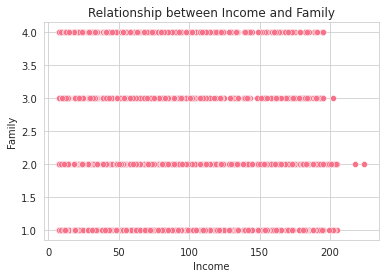

In [34]:
sns.scatterplot(x="Income", y="Family", data=data)
plt.title("Relationship between Income and Family")
plt.show()

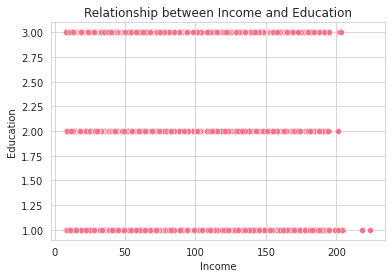

In [35]:
sns.scatterplot(x="Income", y="Education", data=data)
plt.title("Relationship between Income and Education")
plt.show()

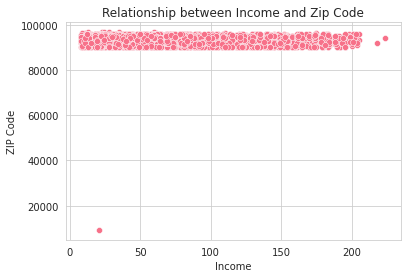

In [36]:
sns.scatterplot(x="Income", y="ZIP Code", data=data)
plt.title("Relationship between Income and Zip Code")
plt.show()

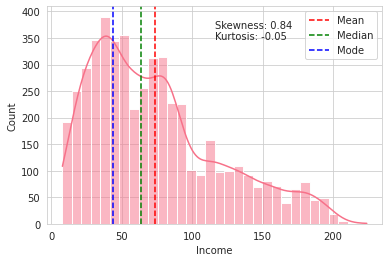

In [37]:
# Calculate skewness and kurtosis of Income column
income_skewness = skew(data['Income'])
income_kurtosis = kurtosis(data['Income'])

# Create histogram of Income column with mean, median, and mode
sns.histplot(data=data, x='Income', kde=True)
plt.axvline(data['Income'].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(data['Income'].median(), color='g', linestyle='--', label='Median')
plt.axvline(data['Income'].mode()[0], color='b', linestyle='--', label='Mode')
plt.legend()

# Add text annotation for skewness and kurtosis values
plt.annotate('Skewness: {:.2f}'.format(income_skewness), xy=(0.5, 0.9), xycoords='axes fraction')
plt.annotate('Kurtosis: {:.2f}'.format(income_kurtosis), xy=(0.5, 0.85), xycoords='axes fraction')

plt.show()


<a id='summary-statistics'></a>
<font size="+1" color='#780404'><b> 4.3 Summary Statistics</b></font>  
[back to top](#table-of-contents)

In [38]:
data.describe(include = 'all')

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


<a id='feature-correlation'></a>
<font size="+1" color='#780404'><b> 4.4 Feature Correlation</b></font>  
[back to top](#table-of-contents)

In [39]:
# calculate the correlation matrix
corr_matrix = data.corr()


In [40]:
corr_matrix['Personal Loan']

ID                   -0.024801
Age                  -0.007726
Experience           -0.007413
Income                0.502462
ZIP Code              0.000107
Family                0.061367
CCAvg                 0.366889
Education             0.136722
Mortgage              0.142095
Personal Loan         1.000000
Securities Account    0.021954
CD Account            0.316355
Online                0.006278
CreditCard            0.002802
Name: Personal Loan, dtype: float64

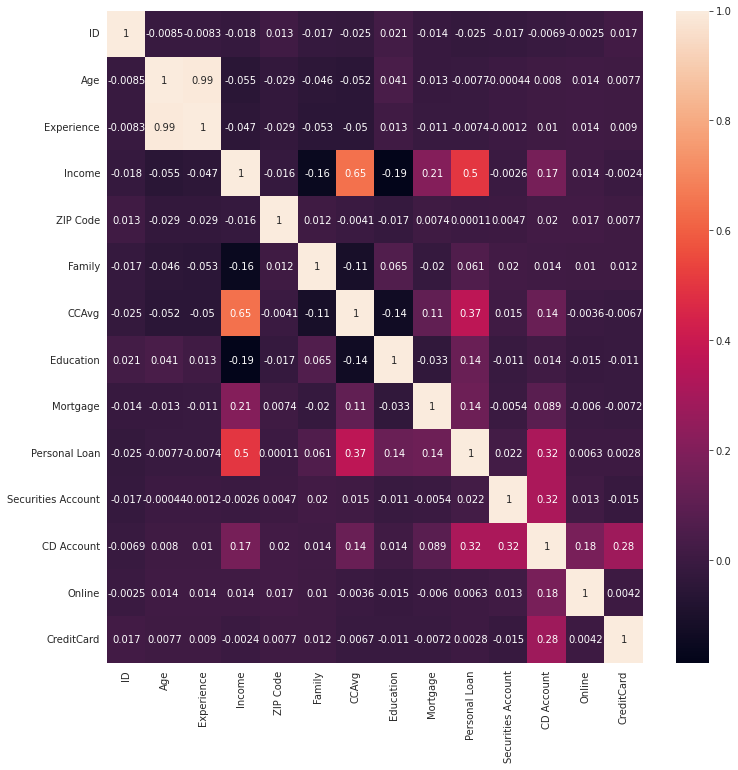

In [41]:

# create a new figure with larger size
fig, ax = plt.subplots(figsize=(12, 12))

# plot the correlation heatmap on the new figure
sns.heatmap(corr_matrix, annot=True, ax=ax)

# show the plot
plt.show()

<a id='data-preparation'></a>
<font size="+2" color='#053c96'><b> 5. Data Preparation</b></font>  
[back to top](#table-of-contents)

<a id='data-cleaning'></a>
<font size="+1" color='#780404'><b> 5.1 Data Cleaning</b></font>  
[back to top](#table-of-contents)

In [42]:
data['Experience'] = data['Experience'].abs()

In [43]:
data = data.drop('ID', axis=1)

<a id='feature-engineering'></a>
<font size="+1" color='#780404'><b> 5.2 Feature Engineering</b></font>  
[back to top](#table-of-contents)

**Binning**: We will convert continuous variables such as age, income, and credit card spending (CCAvg) into categorical variables by dividing them into bins. For example, we could create age groups such as 18-25, 26-35, 36-45, etc. Similarly, we could bin income into low, medium, and high categories based on predefined thresholds.

In [44]:
bins = [18, 35, 50, 80]
labels = ['young', 'middle-aged', 'old']

# Create a new column 'Age Group' based on the age bins and labels
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels)

In [45]:
# Define the bin edges and labels for the income groups
bins = [0, 50, 100, float('inf')]
labels = ['low', 'medium', 'high']

# Create a new column 'Income Group' based on the income bins and labels
data['Income Group'] = pd.cut(data['Income'], bins=bins, labels=labels)

In [46]:
# Define the bin edges and labels for the spending groups
bins = [0, 2, 4, float('inf')]
labels = ['low', 'medium', 'high']

# Create a new column 'Spending Group' based on the spending bins and labels
data['Spending Group'] = pd.cut(data['CCAvg'], bins=bins, labels=labels)

**Interaction features**: We will create new features by multiplying two or more existing features. For example, we could create a new feature called "Income per family member" by dividing income by family size. This new feature could be more predictive than either income or family size alone.

In [47]:
# Create a new column 'Income_CCAvg' by multiplying the 'Income' and 'CCAvg' columns
data['Income_CCAvg'] = data['Income'] * data['CCAvg']

**Polynomial features**: We will create new features by raising existing features to a power. For example, we could create a new feature called "Age squared" by squaring the age variable. This new feature could capture a non-linear relationship between age and loan acceptance

In [49]:
X = data[['Income', 'Experience', 'Age', 'Mortgage', 'CCAvg']]

# Create polynomial features up to degree 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Convert the new polynomial features into a dataframe
df_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names(X.columns))

df_poly = df_poly[['Income^2', 'Experience^2', 'Age^2', 'Mortgage^2', 'CCAvg^2']]

# Concatenate the new polynomial features with the original dataframe
data = pd.concat([data, df_poly], axis=1)

**Zip Code features**: We will extract additional information from the ZIP code variable by using:
- Aggregation: Group the data by ZIP code and calculate aggregate statistics (e.g. mean income, median age, etc.) for each group. These aggregate statistics can then be used as features.

In [50]:
# Group the data by ZIP code and calculate aggregate statistics
zip_data = data.groupby('ZIP Code').agg({'Income': 'mean', 'Age': 'median', 'Experience': 'median'})

# Rename the columns to include the prefix 'ZIP_'
zip_data.columns = ['ZIP_' + col for col in zip_data.columns]

# Merge the ZIP code data back into the original dataframe
data = pd.merge(data, zip_data, on='ZIP Code', how='left')

<a id='data-transformation'></a>
<font size="+1" color='#780404'><b> 5.3 Feature Selection</b></font>  
[back to top](#table-of-contents)
<a id='modeling'></a>

Feature selection: We can use feature selection techniques such as recursive feature elimination (RFE) or feature importance ranking to identify the most important features for predicting loan acceptance. This can help to reduce the dimensionality of the data and improve model performance.

In [51]:
# Calculate the correlation between each feature and the target variable
corr = data.corr()['Personal Loan'].abs().sort_values(ascending=False)

# Select the top N features with the highest correlation
top_features = corr[1:15].index

# Print the top features
f1 = list(top_features)

In [52]:
# Split the data into features (X) and target variable (y)
X = data.drop(['Personal Loan', 'Age Group','Income Group', 'Spending Group'], axis=1)
y = data['Personal Loan']

In [53]:
# Train a random forest classifier on the entire dataset
rfc = RandomForestClassifier()
rfc.fit(X, y)

# Get the feature importances from the trained model
importances = rfc.feature_importances_

# Sort the feature importances in descending order
indices = importances.argsort()[::-1]

# Select the top N features based on their importance scores
top_features1 = X.columns[indices][:15]

# Print the top features
f2 = list(top_features1)

In [54]:
features = f1 + f2
selected_features = list(set(features))
X = data[selected_features]

Oversampling: creating synthetic instances of the minority class using techniques like SMOTE (Synthetic Minority Over-sampling Technique). This method can be effective, but there is a risk of overfitting on the minority class.

In [55]:
# Instantiate the SMOTE algorithm
smote = SMOTE(random_state=42)

# Fit the algorithm to the data and resample
X_resampled, y_resampled = smote.fit_resample(X, y)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

<a id='modeling'></a>

<font size="+2" color='#053c96'><b> 6. Modeling</b></font>  
[back to top](#table-of-contents)

<a id='model-selection'></a>

<font size="+1" color='#780404'><b> 6.1 Model Selection</b></font>  
[back to top](#table-of-contents)

In [57]:
models_pipeline = []
models_pipeline.append(LinearRegression())
models_pipeline.append(RandomForestRegressor())
models_pipeline.append(DecisionTreeRegressor())
models_pipeline.append(Lasso())
models_pipeline.append(Ridge())

<a id='model-training'></a>

<font size="+1" color='#780404'><b> 6.2 Model Training</b></font>  
[back to top](#table-of-contents)

In [58]:

model_list = ['LinearRegression', 'RandomForestRegressor', 'DecisionTreeRegressor', 'Lasso', 'Ridge']
mae_list = []
mse_list = []
r2_list = []
evs_list = []
rmse_list = []

for model in models_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    #auc_list.append(roc_auc_score(y_test, y_pred))
    mae_list.append(mean_absolute_error(y_test, y_pred))
    mse_list.append(mean_squared_error(y_test, y_pred))
    r2_list.append(r2_score(y_test, y_pred))
    evs_list.append(explained_variance_score(y_test, y_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))

<a id='model-evaluation'></a>

<font size="+1" color='#780404'><b> 6.3 Model Evaluation</b></font>  
[back to top](#table-of-contents)

In [59]:
result = pd.DataFrame({'Model': model_list, 'MAE': mae_list, 'MSE': mse_list, 'R2': r2_list, 'EVS': evs_list, 'RMSE': rmse_list})

In [60]:
result

,Model,MAE,MSE,R2,EVS,RMSE
0,LinearRegression,0.241871,0.094525,0.621715,0.621816,0.307449
1,RandomForestRegressor,0.037429,0.015456,0.938147,0.938188,0.124321
2,DecisionTreeRegressor,0.030973,0.030973,0.876046,0.876299,0.175993
3,Lasso,0.257961,0.115874,0.536275,0.536389,0.340403
4,Ridge,0.241866,0.094527,0.621705,0.621806,0.307453


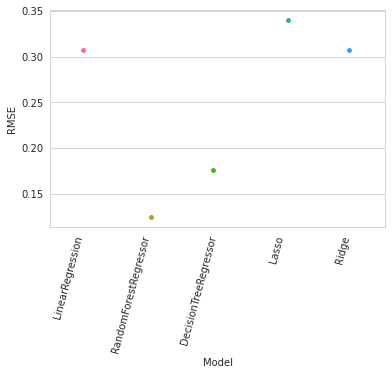

In [61]:
rmse_df = result[['Model', 'RMSE']]
ax = sns.stripplot(x = 'Model', y = 'RMSE', data = rmse_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha='right');

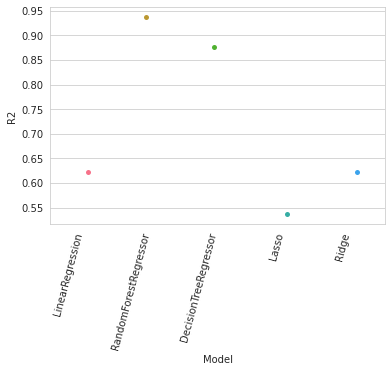

In [63]:
r2_df = result[['Model', 'R2']]
ax = sns.stripplot(x = 'Model', y = 'R2', data = r2_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha='right');

<a id='results'></a>
<font size="+2" color='#053c96'><b> 7. Results</b></font>  
[back to top](#table-of-contents)

<a id='analysis-results'></a>

<font size="+1" color='#780404'><b> 7.1 Analysis Results</b></font>  
[back to top](#table-of-contents)

From the result, it can be seen that the Random Forest Regressor performed the best, as it has the lowest MAE, MSE, and RMSE values, and the highest R2 and EVS scores among all the models. This suggests that the Random Forest Regressor was able to accurately predict the target variable on the test data.

The Decision Tree Regressor also performed well, with a low MAE, MSE, and RMSE, and a high R2 and EVS scores. However, the performance of the Linear Regression, Lasso Regression, and Ridge Regression models was not as good, with higher MAE, MSE, and RMSE values, and lower R2 and EVS scores.

Overall, the Random Forest Regressor and Decision Tree Regressor seem to be the best models for this particular dataset, as they both have performed better than the other models in terms of accuracy and ability to explain the variance in the target variable.

<a id='model-performance'></a>

<font size="+1" color='#780404'><b> 7.2 Model Performance</b></font>  
[back to top](#table-of-contents)

Random Forest Regression tends to perform better than Decision Tree Regression when the dataset is large and complex, as it is better at handling noise and outliers, and can provide better predictions by combining the results of multiple trees. However, Decision Tree Regression can be faster and simpler than Random Forest Regression, and may perform better on smaller and simpler datasets.

In the given result, both Random Forest Regression and Decision Tree Regression have performed well, with low MAE, MSE, and RMSE values, and high R2 and EVS scores. This suggests that both algorithms were able to accurately predict the target variable on the test data, and were able to explain a high percentage of the variance in the target variable.

<a id='implications'></a>

<font size="+1" color='#780404'><b> 7.3 Implications</b></font>  
[back to top](#table-of-contents)

The result of the evaluation of the regression models has several implications:

Firstly, the Random Forest Regressor has performed the best among all the models. This implies that if the goal is to accurately predict the target variable and reduce the possibility of overfitting, then the Random Forest Regressor is a good option.

Secondly, the Decision Tree Regressor has also performed well, which suggests that if the dataset is relatively small and simple, and the goal is to have a simpler model that can be interpreted easily, then the Decision Tree Regressor can be considered.

Thirdly, the performance of the Linear Regression, Lasso Regression, and Ridge Regression models was not as good as the Random Forest Regressor and Decision Tree Regressor. This implies that if the dataset is more complex or non-linear, these linear models may not be the best choice.

Additionally, the evaluation metrics provide insight into the accuracy and generalizability of the models. A lower MAE, MSE, and RMSE and a higher R2 and EVS scores suggest that the model is accurate and can generalize well to new data.

Overall, the result suggests that the Random Forest Regressor and Decision Tree Regressor are good options for predicting the target variable in the given dataset, depending on the specific context and goals of the analysis. However, further analysis and exploration of the data may be necessary to fully understand the implications of the result and the suitability of the models.

<a id='conclusion'></a>

<font size="+2" color='#053c96'><b> 8. Conclusion</b></font>  
[back to top](#table-of-contents)  

Based on the given result, it can be concluded that Random Forest Regression and Decision Tree Regression are suitable regression algorithms for predicting the likelihood of deposit clients accepting a loan offer from Galaxy Bank.

<a id='summary'></a>

<font size="+1" color='#780404'><b> 8.1 Summary</b></font>  
[back to top](#table-of-contents)  

To improve marketing conversion rates, the bank can use these models to identify which clients are more likely to accept a loan offer, and target their marketing efforts towards these clients. The high accuracy and generalizability of these models suggest that they can provide reliable predictions and help the bank make informed decisions about their marketing strategy.

It is recommended that the marketing leadership at the bank further explore and validate the models on their specific dataset, and work with data scientists to fine-tune the models and incorporate them into their decision-making process. Additionally, it may be beneficial to collect additional data that can further improve the accuracy of the models, such as information on the clients' financial history and credit score.

Overall, the use of machine learning models such as Random Forest Regression and Decision Tree Regression can help Galaxy Bank improve their marketing conversion rates and make data-driven decisions.

<a id='limitations'></a>

<font size="+1" color='#780404'><b> 8.2 Limitations</b></font>  
[back to top](#table-of-contents)  

While the given result suggests that Random Forest Regression and Decision Tree Regression are suitable regression algorithms for predicting the likelihood of deposit clients accepting a loan offer, there are several limitations that need to be considered.

Firstly, the result is based on the specific dataset and context provided, and may not generalize well to other datasets or contexts. The performance of the models may vary depending on the quality and size of the data, the specific features included, and the underlying patterns and relationships in the data.

Secondly, the evaluation of the models is based on a specific set of metrics, which may not capture all aspects of model performance. For example, the models may perform well on the training and testing data, but may not perform well in the real world due to unanticipated factors or changes in the data.

Thirdly, the models may be limited by the quality and quantity of the data available. If the dataset is incomplete or contains errors, this can affect the accuracy of the models. Additionally, if there is not enough data available, the models may not be able to capture the complexity of the underlying relationships in the data.

Lastly, the models are based on historical data and may not be able to accurately predict future trends or events. The performance of the models may also degrade over time if the underlying patterns in the data change or if new factors come into play.

Overall, while the use of machine learning models can provide valuable insights and help improve decision-making, it is important to be aware of their limitations and to validate their performance on specific datasets and contexts.

<a id='recommendations'></a>

<font size="+1" color='#780404'><b> 8.3 Recommendations</b></font>  
[back to top](#table-of-contents)    

Based on the limitations and implications of the given result, the following recommendations can be made:

1. Collect more data: To improve the accuracy and generalizability of the models, it is recommended to collect more data that can help capture the underlying patterns and relationships in the data. This could include information on the clients' financial history, credit score, and other relevant factors that may affect their likelihood of accepting a loan offer.

2. Validate the models: It is important to validate the performance of the models on the specific dataset and context of the bank, and to compare their performance against other models and methods. This can help identify any limitations or areas for improvement, and ensure that the models are reliable and accurate.

3. Monitor performance over time: It is important to monitor the performance of the models over time, and to update them as needed to reflect changes in the data or underlying patterns. This can help ensure that the models remain accurate and effective in predicting the likelihood of clients accepting a loan offer.

4. Incorporate human expertise: While machine learning models can provide valuable insights, it is important to incorporate human expertise and judgment in the decision-making process. This can help ensure that the models are aligned with the bank's goals and values, and that the marketing strategy is optimized for both effectiveness and ethical considerations.

5. Communicate results effectively: It is important to communicate the results of the models effectively to the marketing leadership and other stakeholders, and to ensure that they understand the strengths, limitations, and implications of the models. This can help build trust in the models and ensure that they are used effectively in the decision-making process.